# CME538 - Introduction to Data Science
## Tutorial 5 - Exploratory data anlaysis with COVID cases data

### Learning Objectives
After completing this tutorial, you should be comfortable:

- Using basic data exploration and filtering methods
- Using basic dataframe manipulaiton techniques in Pandas
- Doing basic Time-series analysis such as data-time filtering, resampling and change over time

### Lecture Structure
1. [Data Exploration](#section1)
2. [Database Manipulation](#section2)
3. [Time-series Analysis](#section3)

## Setup Notebook

In [1]:
# 3rd party imports
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import numpy as np
import matplotlib as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Overview

In this tutorial we will use Covid datasets to conduct time-seriese analysis of covid growth in some countires. We will use basic techniques for exploring filtering datasets, and use Pandas features to manipulate the dataset into the form we want. Next, we will do basic time-series analysis such as resampling and percentage change over time on the data, and we learn how to plot the results.

<a id='section1'></a>
# 1.  Data exploration and filtering

First, we need to read the database

In [30]:
# import dataframe of global covid cases
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

Let's have a look at the first and last 5 rows of the dataset, as well as its shape, columns, and indices.

In [3]:
#Head
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901


In [4]:
#Tail
df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,298032,299172,299971,300587,301203,301630,301924,302569,303266,304002
279,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,226460,226887,227552,227961,228179,228254,228541,228776,228943,229096


In [5]:
#Shape
df.shape

(280, 741)

In [6]:
#Columns
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/18/22', '1/19/22', '1/20/22', '1/21/22', '1/22/22', '1/23/22',
       '1/24/22', '1/25/22', '1/26/22', '1/27/22'],
      dtype='object', length=741)

In [7]:
list(df.columns)

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [13]:
#Indices
df.index

RangeIndex(start=0, stop=280, step=1)

We can use the .describe function to analyze the columns

In [14]:
# Descirbe 'Province/State'
df['Province/State'].describe()

count                               87
unique                              87
top       Australian Capital Territory
freq                                 1
Name: Province/State, dtype: object

In [15]:
# Descirbe 'Country/Region'
df['Country/Region'].describe()

count       280
unique      196
top       China
freq         34
Name: Country/Region, dtype: object

We can use .unique for analyzing the uniqe values in each column, and .value_counts for the count of each unique value.

In [16]:
# Unique
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [17]:
# Unique
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [18]:
list(df['Province/State'].unique())

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [20]:
# Value_counts
df['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 196, dtype: int64

In [22]:
# Value_counts
dict(df['Country/Region'].value_counts())

{'China': 34,
 'Canada': 16,
 'United Kingdom': 12,
 'France': 12,
 'Australia': 8,
 'Netherlands': 5,
 'Denmark': 3,
 'New Zealand': 2,
 'Panama': 1,
 'Niger': 1,
 'Nigeria': 1,
 'North Macedonia': 1,
 'Norway': 1,
 'Oman': 1,
 'Pakistan': 1,
 'Palau': 1,
 'Peru': 1,
 'Papua New Guinea': 1,
 'Paraguay': 1,
 'Philippines': 1,
 'Poland': 1,
 'Portugal': 1,
 'Qatar': 1,
 'Romania': 1,
 'Russia': 1,
 'Rwanda': 1,
 'Nicaragua': 1,
 'Afghanistan': 1,
 'Saint Lucia': 1,
 'Nepal': 1,
 'Lithuania': 1,
 'Luxembourg': 1,
 'MS Zaandam': 1,
 'Madagascar': 1,
 'Malawi': 1,
 'Malaysia': 1,
 'Maldives': 1,
 'Mali': 1,
 'Malta': 1,
 'Marshall Islands': 1,
 'Mauritania': 1,
 'Mauritius': 1,
 'Mexico': 1,
 'Micronesia': 1,
 'Moldova': 1,
 'Monaco': 1,
 'Mongolia': 1,
 'Montenegro': 1,
 'Morocco': 1,
 'Mozambique': 1,
 'Namibia': 1,
 'Saint Kitts and Nevis': 1,
 'San Marino': 1,
 'Saint Vincent and the Grenadines': 1,
 'Uganda': 1,
 'Tanzania': 1,
 'Thailand': 1,
 'Timor-Leste': 1,
 'Togo': 1,
 'Tonga': 

In [23]:
country_dict = dict(df['Country/Region'].value_counts())
country_dict['Canada']

16

In [25]:
country_df = pd.DataFrame(df['Country/Region'].value_counts())

In [26]:
country_df

,Country/Region
China,34
Canada,16
United Kingdom,12
France,12
Australia,8
...,...
Guinea,1
Guinea-Bissau,1
Guyana,1
Haiti,1


Now that we have some idea about the database, we can filter the values we are interested in. Let's have a look at Canada's data.

In [27]:
df[df['Country/Region'] == 'Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
39,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,455660,459497,463024,466616,466616,466616,466616,477841,477841,484400
40,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,301178,303565,305715,308079,308079,308079,308079,314787,314787,318906
41,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,111432,112346,113196,114021,114021,114021,116133,116770,116770,117971
44,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,23503,24001,24489,25003,25465,25465,26391,26741,26741,27649
45,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,13327,13838,14198,14522,14522,14522,14522,15811,15811,16493
46,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,4234,4372,4508,4680,4680,4680,4680,5120,5120,5446
47,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,31445,31860,32387,33083,33083,33083,34689,35051,35543,35889
48,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,1222,1242,1242,1297,1297,1297,1358,1439,1439,1487


we can add more conditions to our filter

In [29]:
df[(df['Country/Region'] == 'Canada') | (df['Province/State'] == 'Ontario')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
39,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,455660,459497,463024,466616,466616,466616,466616,477841,477841,484400
40,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,301178,303565,305715,308079,308079,308079,308079,314787,314787,318906
41,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,111432,112346,113196,114021,114021,114021,116133,116770,116770,117971
44,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,23503,24001,24489,25003,25465,25465,26391,26741,26741,27649
45,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,13327,13838,14198,14522,14522,14522,14522,15811,15811,16493
46,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,4234,4372,4508,4680,4680,4680,4680,5120,5120,5446
47,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,31445,31860,32387,33083,33083,33083,34689,35051,35543,35889
48,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,1222,1242,1242,1297,1297,1297,1358,1439,1439,1487


Now let's go back to see why the province/state column has so many null values. We can use the .null function

In [32]:
df['Province/State'].isnull().value_counts()

True     193
False     87
Name: Province/State, dtype: int64

In [34]:
df[~df['Province/State'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,27618,28510,28472,29240,30634,31366,31941,33071,33933,34418
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,864817,895004,919876,939615,960099,975564,994277,1015495,1033364,1083622
10,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,7318,7731,8219,8676,9047,9645,9702,10721,11355,12309
11,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,265565,282336,298367,298194,325151,325150,344844,358336,369936,369807
12,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,81783,84920,89043,94081,97612,100028,103175,104550,109555,110332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,11064,11216,11392,11557,11702,11835,11937,12103,12277,12441
266,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,20087,20179,20306,20425,20425,20425,20586,21112,21200,21292
267,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,146,148,151,152,155,155,158,161,161,161
268,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [37]:
df[~df['Province/State'].isnull()]['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

<a id='section2'></a>
# 2. Database manipulation

In [38]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,298032,299172,299971,300587,301203,301630,301924,302569,303266,304002


So basically, we want to reshape it into a database where the columns are countries and the rows are the dates. This way for a given data. We are looking at country-level data so we can sum the numbers for the states to get a total number for the country.

Since we do not need the Lat/Long and province data, we can simply remove them from our database

In [8]:
df.drop(columns=['Lat','Long','Province/State'])

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
1,Albania,0,0,0,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
2,Algeria,0,0,0,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
3,Andorra,0,0,0,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
4,Angola,0,0,0,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,0,2,2,2,2,2,2,2,2,...,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208
276,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444
277,Yemen,0,0,0,0,0,0,0,0,0,...,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888
278,Zambia,0,0,0,0,0,0,0,0,0,...,298032,299172,299971,300587,301203,301630,301924,302569,303266,304002


keep in mind that you need to redefine the variable, or the database will remain unchanged

In [31]:
df = df.drop(columns=['Lat','Long','Province/State'])

In [36]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
1,Albania,0,0,0,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
2,Algeria,0,0,0,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
3,Andorra,0,0,0,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
4,Angola,0,0,0,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,0,2,2,2,2,2,2,2,2,...,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208
276,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444
277,Yemen,0,0,0,0,0,0,0,0,0,...,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888
278,Zambia,0,0,0,0,0,0,0,0,0,...,298032,299172,299971,300587,301203,301630,301924,302569,303266,304002


Now let's use the groupby function to sum up the province data

In [39]:
df.groupby('Country/Region').agg('sum')

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
Albania,0,0,0,0,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
Algeria,0,0,0,0,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
Angola,0,0,0,0,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444
Yemen,0,0,0,0,0,0,0,0,0,0,...,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888


In [41]:
df = df.groupby('Country/Region').agg('sum')

In [42]:
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
Albania,0,0,0,0,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
Algeria,0,0,0,0,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
Angola,0,0,0,0,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444
Yemen,0,0,0,0,0,0,0,0,0,0,...,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888


You can see that now our database has 196 rows

Also note that there are different ways to group by, for instance if you were looking for the count of instnces rather that sum of the numbers, you couls use the code below

In [43]:
df.groupby('Country/Region').agg('count')

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Albania,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andorra,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Angola,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
West Bank and Gaza,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Yemen,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


The next step would be to change columns with rows! This is called transposing the dataframe:

Notice the change in the 'Country/Regoin' index

In [46]:
df[df.index == 'Canada']

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,0,0,0,0,1,1,2,2,2,4,...,2821804,2844397,2867929,2890916,2905428,2911261,2932025,2960588,2966448,2997728


In [47]:
df.T

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/23/22,159649,248070,236670,33025,96582,5931,7862536,351711,2229104,1600041,...,15966838,588995,213767,7,469566,2141422,480583,10585,301630,228254
1/24/22,159896,248070,238885,33025,97263,6023,7940657,352399,2287126,1625651,...,16063010,599040,215063,7,469566,2155784,484979,10585,301924,228541
1/25/22,160252,248859,241406,34701,97594,6023,8041520,353731,2340046,1650597,...,16158455,609785,216186,7,471389,2171527,488599,10585,302569,228776
1/26/22,160692,251015,243568,35028,97812,6442,8130023,355662,2391062,1684608,...,16260882,621453,217360,7,475135,2187481,492694,10821,303266,228943


In [48]:
df = df.T

In [49]:
df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/23/22,159649,248070,236670,33025,96582,5931,7862536,351711,2229104,1600041,...,15966838,588995,213767,7,469566,2141422,480583,10585,301630,228254
1/24/22,159896,248070,238885,33025,97263,6023,7940657,352399,2287126,1625651,...,16063010,599040,215063,7,469566,2155784,484979,10585,301924,228541
1/25/22,160252,248859,241406,34701,97594,6023,8041520,353731,2340046,1650597,...,16158455,609785,216186,7,471389,2171527,488599,10585,302569,228776
1/26/22,160692,251015,243568,35028,97812,6442,8130023,355662,2391062,1684608,...,16260882,621453,217360,7,475135,2187481,492694,10821,303266,228943


<a id='section3'></a>
# 3. Time-series analysis

### DateTime features

Although, the indices are dates, but they are still string values. If we change that to datetime values, then we can use a range of great features 

In [51]:
df.index[0]

'1/22/20'

We can use pd.DatetimeIndex to change the index into datetime

In [53]:
df.index = pd.DatetimeIndex(df.index)

In [54]:
df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-23,159649,248070,236670,33025,96582,5931,7862536,351711,2229104,1600041,...,15966838,588995,213767,7,469566,2141422,480583,10585,301630,228254
2022-01-24,159896,248070,238885,33025,97263,6023,7940657,352399,2287126,1625651,...,16063010,599040,215063,7,469566,2155784,484979,10585,301924,228541
2022-01-25,160252,248859,241406,34701,97594,6023,8041520,353731,2340046,1650597,...,16158455,609785,216186,7,471389,2171527,488599,10585,302569,228776
2022-01-26,160692,251015,243568,35028,97812,6442,8130023,355662,2391062,1684608,...,16260882,621453,217360,7,475135,2187481,492694,10821,303266,228943


In [55]:
df.index[0]

Timestamp('2020-01-22 00:00:00')

This provides a range of features we can use to filter the dataframe

In [56]:
df[df.index.day == 1]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-02-01,0,0,0,0,0,0,0,0,12,0,...,2,0,0,0,0,6,0,0,0,0
2020-03-01,5,0,1,0,0,0,0,1,27,14,...,94,0,0,0,0,16,0,0,0,0
2020-04-01,192,259,847,390,8,7,1054,571,4862,10711,...,43789,350,181,0,143,218,134,0,36,8
2020-05-01,2171,782,4154,745,30,25,4532,2148,6778,15531,...,183501,648,2086,0,335,270,353,7,109,40
2020-06-01,15836,1143,9513,765,86,26,17415,9492,7221,16733,...,258983,825,3702,0,1662,328,449,354,1089,203
2020-07-01,31848,2580,14272,855,291,69,67197,26065,8001,17873,...,285279,943,8781,0,6062,355,2758,1190,1632,605
2020-08-01,36796,5396,30950,925,1164,91,196543,38841,17895,21212,...,305562,1278,24783,0,19443,590,12160,1730,6228,3659
2020-09-01,38282,9606,44833,1184,2729,94,428239,43878,25923,27642,...,339415,1611,42127,0,47756,1044,23281,1962,12381,6559
2020-10-01,39371,13806,51690,2050,5114,101,765002,50850,27109,45686,...,462777,2061,57190,0,76029,1095,40322,2039,14802,7850
2020-11-01,41425,21202,58272,4825,11035,128,1173533,92254,27601,109881,...,1038056,3149,67156,0,92325,1180,54060,2063,16480,8374


In [57]:
df[df.index.month == 1]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-23,159649,248070,236670,33025,96582,5931,7862536,351711,2229104,1600041,...,15966838,588995,213767,7,469566,2141422,480583,10585,301630,228254
2022-01-24,159896,248070,238885,33025,97263,6023,7940657,352399,2287126,1625651,...,16063010,599040,215063,7,469566,2155784,484979,10585,301924,228541
2022-01-25,160252,248859,241406,34701,97594,6023,8041520,353731,2340046,1650597,...,16158455,609785,216186,7,471389,2171527,488599,10585,302569,228776
2022-01-26,160692,251015,243568,35028,97812,6442,8130023,355662,2391062,1684608,...,16260882,621453,217360,7,475135,2187481,492694,10821,303266,228943


In [58]:
df['2020']

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,51848,56254,98249,7821,17240,155,1583297,157834,28337,351892,...,2295232,16728,76751,1,112316,1441,133093,2094,19834,13077
2020-12-28,52007,56572,98631,7875,17296,158,1590513,157948,28349,353484,...,2336692,17306,76832,1,112636,1451,134310,2096,19943,13148
2020-12-29,52147,57146,98988,7919,17371,158,1602163,158296,28381,355352,...,2389967,17962,76907,1,112861,1454,135459,2096,20177,13325
2020-12-30,52330,57727,99311,7983,17433,158,1613928,158878,28405,357902,...,2440206,18480,76985,1,113121,1456,136736,2097,20462,13625


In [59]:
df['2020-01']

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-31,0,0,0,0,0,0,0,0,9,0,...,2,0,0,0,0,2,0,0,0,0


The code ebove is simialr to a two condition filter

In [60]:
df[(df.index.month == 1) & (df.index.year == 2020)]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-31,0,0,0,0,0,0,0,0,9,0,...,2,0,0,0,0,2,0,0,0,0


We also filter out a range of dates

In [61]:
df['2020-04-05': '2020-04-10']

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-04-05,299,361,1320,501,14,15,1451,822,5687,12051,...,61422,406,342,0,159,241,237,0,39,9
2020-04-06,337,377,1423,525,16,15,1554,833,5797,12297,...,66738,415,457,0,165,245,254,0,39,10
2020-04-07,367,383,1468,545,17,19,1628,853,5895,12639,...,72224,424,520,0,165,249,261,0,39,11
2020-04-08,423,400,1572,564,19,19,1715,881,6010,12942,...,77387,456,545,0,167,251,263,0,39,11
2020-04-09,444,409,1666,583,19,19,1795,921,6108,13244,...,82293,473,582,0,171,255,263,0,39,11
2020-04-10,521,416,1761,601,19,19,1975,937,6215,13555,...,86660,494,624,0,171,257,267,1,40,13


Now that we know the datetime features, we can start analyzing our database

first, let's sort the data from the highest covid cases to lowest. We can do this by the last row (the last date we have)

In [63]:
df.sort_values(by=df.index[-1],axis=1,ascending=False)

Country/Region,US,India,Brazil,France,United Kingdom,Turkey,Russia,Italy,Spain,Germany,...,Solomon Islands,Diamond Princess,Kiribati,Holy See,Samoa,MS Zaandam,Vanuatu,Marshall Islands,Tonga,Micronesia
2020-01-22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-23,70845794,39543328,24054405,16807733,15966838,10947129,10923494,9923678,8975458,8773030,...,289,712,39,29,18,9,7,7,1,1
2022-01-24,71741698,39799202,24142032,16917220,16063010,11014152,10988027,10001344,9280890,8909503,...,289,712,59,29,20,9,7,7,1,1
2022-01-25,72257016,40085116,24342322,17420569,16158455,11090493,11055246,10212621,9395767,9088672,...,650,712,66,29,26,9,7,7,1,1
2022-01-26,72910136,40371500,24560093,17848291,16260882,11167927,11129318,10383561,9529320,9317280,...,676,712,116,29,28,9,7,7,1,1


If we wanted to sort the dataframe based on a column value, we should change the axis number to 0

In [65]:
df.sort_values(by = df.columns[-1], axis=0, ascending=False)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2022-01-27,161004,252577,245698,35028,97901,6524,8207752,358218,2457285,1727661,...,16358047,631019,218477,7,477022,2203208,500444,10888,304002,229096
2022-01-26,160692,251015,243568,35028,97812,6442,8130023,355662,2391062,1684608,...,16260882,621453,217360,7,475135,2187481,492694,10821,303266,228943
2022-01-25,160252,248859,241406,34701,97594,6023,8041520,353731,2340046,1650597,...,16158455,609785,216186,7,471389,2171527,488599,10585,302569,228776
2022-01-24,159896,248070,238885,33025,97263,6023,7940657,352399,2287126,1625651,...,16063010,599040,215063,7,469566,2155784,484979,10585,301924,228541
2022-01-23,159649,248070,236670,33025,96582,5931,7862536,351711,2229104,1600041,...,15966838,588995,213767,7,469566,2141422,480583,10585,301630,228254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-26,5,0,1,0,0,0,0,0,15,2,...,37,0,0,0,0,16,0,0,0,0
2020-02-25,5,0,1,0,0,0,0,0,15,2,...,34,0,0,0,0,16,0,0,0,0
2020-02-24,5,0,0,0,0,0,0,0,15,0,...,30,0,0,0,0,16,0,0,0,0
2020-02-23,0,0,0,0,0,0,0,0,15,0,...,28,0,0,0,0,16,0,0,0,0


In [66]:
df = df.sort_values(by=df.index[-1],axis=1,ascending=False)

In [67]:
df

Country/Region,US,India,Brazil,France,United Kingdom,Turkey,Russia,Italy,Spain,Germany,...,Solomon Islands,Diamond Princess,Kiribati,Holy See,Samoa,MS Zaandam,Vanuatu,Marshall Islands,Tonga,Micronesia
2020-01-22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-23,70845794,39543328,24054405,16807733,15966838,10947129,10923494,9923678,8975458,8773030,...,289,712,39,29,18,9,7,7,1,1
2022-01-24,71741698,39799202,24142032,16917220,16063010,11014152,10988027,10001344,9280890,8909503,...,289,712,59,29,20,9,7,7,1,1
2022-01-25,72257016,40085116,24342322,17420569,16158455,11090493,11055246,10212621,9395767,9088672,...,650,712,66,29,26,9,7,7,1,1
2022-01-26,72910136,40371500,24560093,17848291,16260882,11167927,11129318,10383561,9529320,9317280,...,676,712,116,29,28,9,7,7,1,1


Pandas provides plotting features as well

For instance we can plot the columns we want with a simple method: .plot()

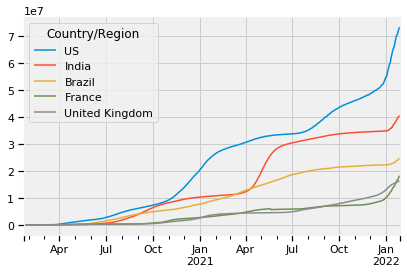

In [68]:
df[['US','India','Brazil','France','United Kingdom']].plot()

Remeber you can always use the help function to see what methods and features are avialable to you

In [69]:
help(df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

The discription above tells us we can change the type of the chart by adding a "kind" parameter. Let's try that


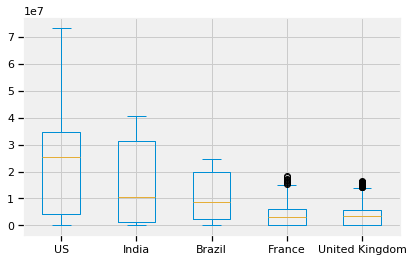

In [73]:
df[['US','India','Brazil','France','United Kingdom']].plot(kind = 'box')

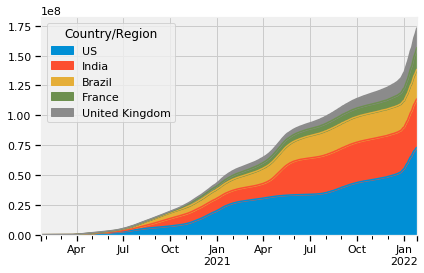

In [71]:
df[['US','India','Brazil','France','United Kingdom']].plot(kind = 'area')

or we can add a marker and change the figure size

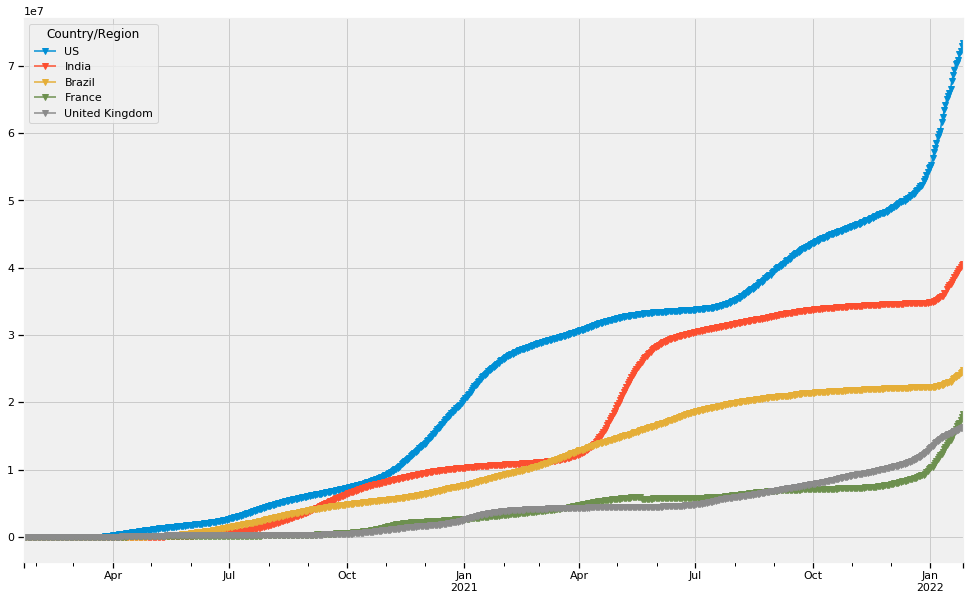

In [75]:
df[['US','India','Brazil','France','United Kingdom']].plot(marker='v',figsize=(15,10))

As you can see, the marker can not be seen easily. Maybe it's better to reduce our datapoints from daily to weekly. But for that we need to take the average of every week into one row. We can use reampling to do that

### Resampling Time-Series Dataframe
We can easily resample the time-series to any time-frequency with resample method. You may resample the time-series dataframes or series to any time-frequency you like with:

df.resample()

In [76]:
df.resample('W').mean()

Country/Region,US,India,Brazil,France,United Kingdom,Turkey,Russia,Italy,Spain,Germany,...,Solomon Islands,Diamond Princess,Kiribati,Holy See,Samoa,MS Zaandam,Vanuatu,Marshall Islands,Tonga,Micronesia
2020-01-26,2.200000e+00,0.000000e+00,0.000000e+00,1.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2020-02-02,6.571429e+00,7.142857e-01,0.000000e+00,4.857143e+00,8.571429e-01,0.000000e+00,8.571429e-01,8.571429e-01,2.857143e-01,5.142857e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2020-02-09,1.157143e+01,3.000000e+00,0.000000e+00,7.428571e+00,1.000000e+01,0.000000e+00,2.000000e+00,2.428571e+00,1.142857e+00,1.257143e+01,...,0.000000,26.571429,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2020-02-16,1.342857e+01,3.000000e+00,0.000000e+00,1.128571e+01,1.657143e+01,0.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.571429e+01,...,0.000000,211.142857,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2020-02-23,1.485714e+01,3.000000e+00,0.000000e+00,1.200000e+01,2.200000e+01,0.000000e+00,2.000000e+00,3.557143e+01,2.000000e+00,1.600000e+01,...,0.000000,601.428571,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-02,5.415928e+07,3.484900e+07,2.227786e+07,9.842358e+06,1.281433e+07,9.442443e+06,1.029883e+07,5.998725e+06,6.182423e+06,7.140957e+06,...,23.428571,712.000000,2.000000,27.000000,3.000000,9.0,7.0,4.000000,1.0,1.0
2022-01-09,5.850213e+07,3.527406e+07,2.240776e+07,1.131328e+07,1.407239e+07,9.785981e+06,1.042175e+07,6.928079e+06,6.970350e+06,7.428591e+06,...,26.285714,712.000000,2.000000,27.000000,3.000000,9.0,7.0,5.714286,1.0,1.0
2022-01-16,6.402819e+07,3.653440e+07,2.281088e+07,1.333659e+07,1.504089e+07,1.026113e+07,1.054727e+07,8.152686e+06,7.861506e+06,7.836878e+06,...,25.428571,712.000000,2.000000,27.000000,3.000000,9.0,7.0,7.000000,1.0,1.0
2022-01-23,6.912851e+07,3.856980e+07,2.358463e+07,1.566736e+07,1.570153e+07,1.073600e+07,1.077062e+07,9.393586e+06,8.768733e+06,8.473587e+06,...,118.571429,712.000000,27.857143,28.714286,10.142857,9.0,7.0,7.000000,1.0,1.0


Now we can plot our resampled plot. As you can see this one looks better

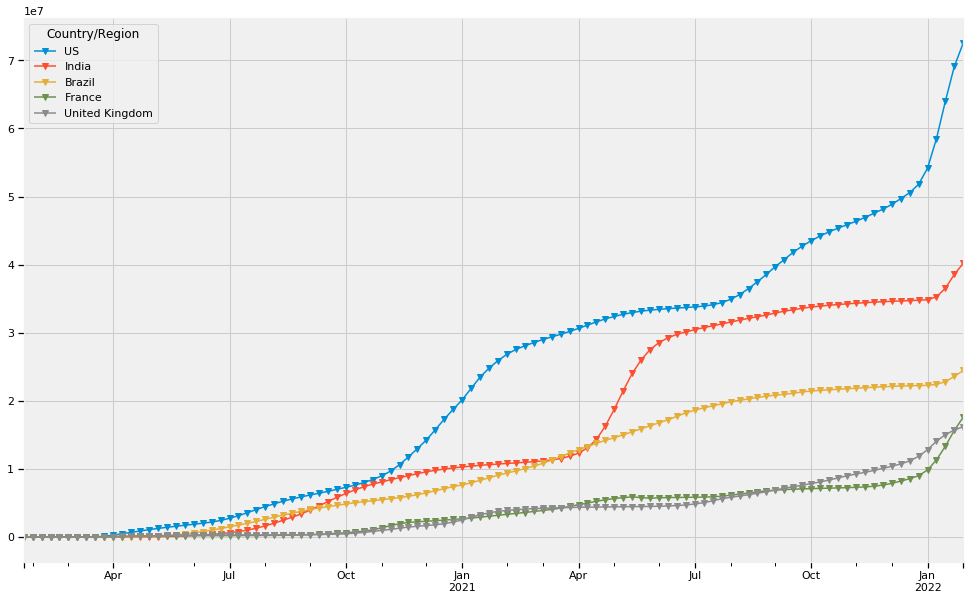

In [77]:
df[['US','India','Brazil','France','United Kingdom']].resample('W').mean().plot(marker='v',figsize=(15,10))

Now that we have weekly average data, we can caculate weekly changes

In [78]:
df = df.resample('W').mean()

Pandas provides a method for calculating percentage change between rows and columns. .pct_change

In [79]:
df.pct_change()

Country/Region,US,India,Brazil,France,United Kingdom,Turkey,Russia,Italy,Spain,Germany,...,Solomon Islands,Diamond Princess,Kiribati,Holy See,Samoa,MS Zaandam,Vanuatu,Marshall Islands,Tonga,Micronesia
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,1.987013,inf,NaN,2.035714,inf,NaN,inf,inf,inf,inf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-09,0.760870,3.200000,NaN,0.529412,10.666667,NaN,1.333333,1.833333,3.000000,1.444444,...,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,0.160494,0.000000,NaN,0.519231,0.657143,NaN,0.000000,0.235294,0.750000,0.250000,...,NaN,6.946237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-23,0.106383,0.000000,NaN,0.063291,0.327586,NaN,0.000000,10.857143,0.000000,0.018182,...,NaN,1.848444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-02,0.045758,0.002193,0.002099,0.094262,0.081821,0.021015,0.015698,0.085927,0.091821,0.027535,...,0.171429,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2022-01-09,0.080187,0.012197,0.005831,0.149448,0.098176,0.036382,0.011936,0.154925,0.127446,0.040279,...,0.121951,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.428571,0.0,0.0
2022-01-16,0.094459,0.035730,0.017990,0.178844,0.068823,0.048554,0.012044,0.176760,0.127850,0.054962,...,-0.032609,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.225000,0.0,0.0
2022-01-23,0.079657,0.055712,0.033921,0.174765,0.043923,0.046278,0.021176,0.152208,0.115401,0.081245,...,3.662921,0.000000,12.928571,0.063492,2.380952,0.0,0.0,0.000000,0.0,0.0


The function calculates the difference between one value to the next, and divides that by the first value. 

If both values are 0, then the output will be Nan. If the first is 0 and then the next is not, the value will be infinity (inf)

Let's see how many null values there is for each column

In [82]:
df.pct_change().isnull().sum(axis=0)

Country/Region
US                   1
India                1
Brazil               5
France               1
United Kingdom       1
                    ..
MS Zaandam           9
Vanuatu             42
Marshall Islands    40
Tonga               92
Micronesia          52
Length: 196, dtype: int64

we can use to_frame function to convert this into a dataframe

In [83]:
df.pct_change().isnull().sum(axis=0).to_frame()

,0
Country/Region,
US,1
India,1
Brazil,5
France,1
United Kingdom,1
...,...
MS Zaandam,9
Vanuatu,42
Marshall Islands,40


we can also use the dropna funciton to drop all the rows with nan values

In [84]:
df.pct_change().dropna()

Country/Region,US,India,Brazil,France,United Kingdom,Turkey,Russia,Italy,Spain,Germany,...,Solomon Islands,Diamond Princess,Kiribati,Holy See,Samoa,MS Zaandam,Vanuatu,Marshall Islands,Tonga,Micronesia
2021-10-31,0.011177,0.002998,0.003788,0.005458,0.034501,0.024264,0.031798,0.005848,0.002690,0.026653,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.357143,0.000000,inf,0.0
2021-11-07,0.011211,0.002549,0.003251,0.006117,0.029999,0.023835,0.032992,0.006804,0.002609,0.034297,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.105263,0.000000,1.333333,0.0
2021-11-14,0.011600,0.002356,0.003550,0.008654,0.026580,0.023142,0.031652,0.009554,0.003985,0.049441,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2021-11-21,0.013416,0.002192,0.002917,0.013462,0.029359,0.019880,0.029426,0.012159,0.006088,0.063230,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2021-11-28,0.012453,0.001902,0.002955,0.022338,0.031029,0.020137,0.026582,0.015186,0.009129,0.074034,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2021-12-05,0.014688,0.001726,0.002809,0.033611,0.030708,0.018896,0.024629,0.018605,0.012982,0.071078,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2021-12-12,0.017304,0.001733,0.002552,0.041537,0.032885,0.016345,0.022962,0.021396,0.015139,0.059536,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2021-12-19,0.017579,0.001433,0.001372,0.043235,0.041355,0.014959,0.020749,0.027389,0.028442,0.047811,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.0
2021-12-26,0.024313,0.001416,0.001023,0.050809,0.060454,0.014363,0.018579,0.040084,0.046169,0.034357,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.020833,0.000000,0.000000,0.0
2022-01-02,0.045758,0.002193,0.002099,0.094262,0.081821,0.021015,0.015698,0.085927,0.091821,0.027535,...,0.171429,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [85]:
df[['US','India','Brazil','France','United Kingdom']].pct_change().dropna()

Country/Region,US,India,Brazil,France,United Kingdom
2020-03-01,0.336538,0.000000,inf,3.392857,1.311688
2020-03-08,10.359712,7.190476,7.285714,9.314363,5.039326
2020-03-15,6.927802,2.087209,9.517241,4.383342,4.856279
2020-03-22,8.188529,1.977401,6.990164,2.830055,2.760623
2020-03-29,4.516571,2.363061,3.367460,1.651948,2.123928
...,...,...,...,...,...
2022-01-02,0.045758,0.002193,0.002099,0.094262,0.081821
2022-01-09,0.080187,0.012197,0.005831,0.149448,0.098176
2022-01-16,0.094459,0.035730,0.017990,0.178844,0.068823
2022-01-23,0.079657,0.055712,0.033921,0.174765,0.043923
